## **1. Prepare (data for exploration)**

In [220]:
#import all relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import pypandoc

In [203]:
#read all 3 datasets into dataframe for analysis
df_train = pd.read_csv("C:/Users/kwame\Documents/Python/Nana_Akua/train.csv")
df_test = pd.read_csv("C:/Users/kwame\Documents/Python/Nana_Akua/test.csv")
df_gsub = pd.read_csv("C:/Users/kwame\Documents/Python/Nana_Akua/gender_submission.csv")

## 2. Process (data from dirty to clean)

### **2.1 Inspect DataFrames**

In [204]:
#check first 5 rows of all 3 dataframes
print("First 5 rows of df_train:")
display(df_train.head())

print("First 5 rows of df_test:")
display(df_test.head())

print("First 5 rows of df_gsub:")
display(df_gsub.head())

First 5 rows of df_train:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First 5 rows of df_test:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


First 5 rows of df_gsub:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [205]:
#check shape of all 3 dataframes
print("Number of rows & columns of df_train:")
display(df_train.shape)
print("\n")

print("Number of rows & columns of df_test:")
display(df_test.shape)
print("\n")

print("Number of rows & columns of df_gsub:")
display(df_gsub.shape)
print("\n")

Number of rows & columns of df_train:


(891, 12)



Number of rows & columns of df_test:


(418, 11)



Number of rows & columns of df_gsub:


(418, 2)

In [206]:
#check attributes of all 3 dataframes' contents
print("df_train:")
display(df_train.info())
print("\n")

print("df_test:")
display(df_test.info())
print("\n")

print("df_gsub:")
display(df_gsub.info())
print("\n")

df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None



df_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None



df_gsub:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


None

### **2.2 Clean DataFrames**

#### *2.2.1 Handle Null Values*

In [207]:
#Check for number of missing values in the Age, Cabin and Embarked columns of df_train 
print("\033[1m" + "df_train missing values:" + "\033[0m")
print("Age column:")
display(df_train["Age"].isnull().sum())

print("Cabin column:")
display(df_train["Cabin"].isnull().sum())

print("Embarked column:")
display(df_train["Embarked"].isnull().sum())
print("\n")

#Check for number of missing values in the Age, Fare and Cabin columns of df_test
print("\033[1m" + "df_test missing values:" + "\033[0m")
print("Age column:")
display(df_test["Age"].isnull().sum())

print("Fare column:")
display(df_test["Fare"].isnull().sum())

print("Cabin:")
display(df_test["Cabin"].isnull().sum())

df_train missing values:
Age column:


177

Cabin column:


687

Embarked column:


2



df_test missing values:
Age column:


86

Fare column:


1

Cabin:


327

In [208]:
""" 
    The Embarked column of df_train contains just 2 rows with 2 null values.
    The Fare column of df_test contain just 1 row with null values.
    Therefore, dropping those rows would not affect the data significantly.
    
    """
#drop rows with null values in the Embarked column of df_train
df_train = df_train.dropna(subset = ["Embarked"], how = "any")

#drop rows with null values in the Fare column of df_test
df_test = df_test.dropna(subset = ["Fare"], how = "any")

In [209]:
""" 
    The Cabin columns of both df_train and df_test contains too many null values, over 77% each.
    It would, therefore, be best to drop the columns in both data frames. 
    
    """
#drop Cabin column from the df_train
df_train = df_train.drop("Cabin", axis = 1)

#drop Cabin column from the df_test
df_test = df_test.drop("Cabin", axis = 1)

In [210]:
""" 
    The Age column is an important column in both dataframes and so cannot be dropped.
    It would be filled with the mean age of the column.
    
    """
#Fill the Age column with the mean age value in df_train
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())

#Fill the Age column with the mean age value in df_test
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())


In [211]:
"""
    Confirm that all changes have taken effect
    """
#check attributes of all contents of df_train and df_test
print("df_train:")
display(df_train.info())
print("\n")

print("df_test:")
display(df_test.info())
print("\n")

df_train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


None



df_test:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


None

### *2.2.2 Handle Duplicates*

In [212]:
"""
    From inspection, only the PassengerId columns in all 3 datasets must not have duplicates
    """
#Check for duplicates in the PassengerId column of df_train
print("\033[1m" + "PassengerId column duplicates:" + "\033[0m")
if df_train["PassengerId"].duplicated().any():
    print("df_train has duplicate values")
else:
    print("df_train - No duplicates")
    
#Check for duplicates in the PassengerId column of df_test
if df_test["PassengerId"].duplicated().any():
    print("df_test has duplicate values")
else:
    print("df_test - No duplicates")

#Check for duplicates in the PassengerId column of df_gsub
if df_gsub["PassengerId"].duplicated().any():
    print("df_gsub has duplicate values")
else:
    print("df_gsub - No duplicates")

PassengerId column duplicates:
df_train - No duplicates
df_test - No duplicates
df_gsub - No duplicates


### 2.2.3 *Check for Outliers*

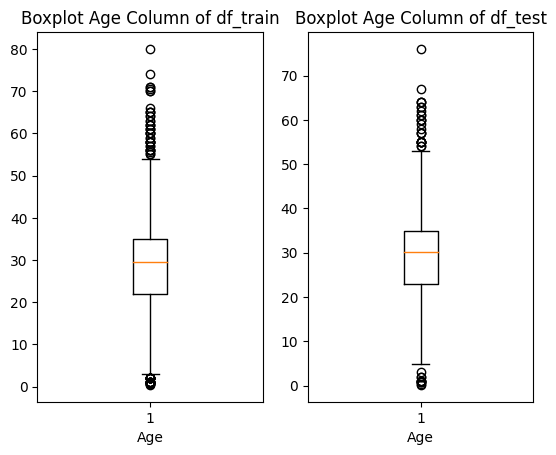

df_train outlers:
[0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]


df_test outlers:
[0.17, 0.33, 0.75, 0.83, 0.92, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 54.0, 54.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 57.0, 57.0, 57.0, 58.0, 59.0, 60.0, 60.0, 60.0, 61.0, 61.0, 62.0, 63.0, 63.0, 64.0, 64.0, 64.0, 67.0, 76.0]


In [213]:
"""
    The Age column of the df_train and df_test dataframes could have outliers that could skew analysis and decisions. 
    Boxplots will be used to check for outliers in both columns
    """
#Create a boxplot to visualize Age distribution in df_train & df_test
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df_train["Age"])
ax[0].set_title("Boxplot Age Column of df_train")
ax[0].set_xlabel("Age")

ax[1].boxplot(df_test["Age"])
ax[1].set_title("Boxplot Age Column of df_test")
ax[1].set_xlabel("Age")

#Display plot
plt.show()

#Identify outliers for df_train
Q1 = df_train["Age"].quantile(0.25)
Q3 = df_train["Age"].quantile(0.75)
IQR = Q3 - Q1

outliers = df_train[(df_train["Age"] < (Q1 - 1.5 * IQR)) | (df_train["Age"] > (Q3 + 1.5 * IQR))]
print("\033[1m" + "df_train outlers:" + "\033[0m")
print(sorted(outliers["Age"].values.tolist()))
print("\n")

#Identify outliers for df_test
Q1 = df_test["Age"].quantile(0.25)
Q3 = df_test["Age"].quantile(0.75)
IQR = Q3 - Q1

outliers = df_test[(df_test["Age"] < (Q1 - 1.5 * IQR)) | (df_test["Age"] > (Q3 + 1.5 * IQR))]
print("\033[1m" + "df_test outlers:" + "\033[0m")
print(sorted(outliers["Age"].values.tolist()))

In [214]:
"""
    Inspection of the outliers shows ages below 1 which likely represents babies under 1 year of age.
    df_train has 7 such ages and df_test has 5. 
    These will not affect analysis significantly and so will be removed. 
    """
#Remove outlier ages less than 1 yr from df_train
df_train = df_train[df_train["Age"] >= 1]

#Remove outlier ages less than 1 yr from df_test
df_test = df_test[df_test["Age"] >= 1]

### 2.2.3 *Ensure Correct Datatypes*

In [215]:
"""
    Age column in df_train and df_test are in float64. 
    They will be converted to an int64
    """
#Convert Age column in df_train format from float64 to int64
df_train["Age"] = df_train["Age"].astype("int64")

#Convert Age column in df_test format from float64 to int64
df_test["Age"] = df_test["Age"].astype("int64")

### *2.2.4 Handle Any Remaining Errors*

In [216]:
"""
    Sex columns must contain only 2 types of entries, male or female. 
    """
#confrim only male and female entries in df_train 
display(df_train["Sex"].unique())
print("\n")

#confrim only male and female entries in df_test
df_test["Sex"].unique()


array(['male', 'female'], dtype=object)

array(['male', 'female'], dtype=object)

In [217]:
"""
    Any columns that are not significatnt to the data and its anlaysis must be removed. 
    Inspection reveals the index and Name columns fall within such category and so will be removed. 
    """
#drop name column of df_train
df_train = df_train.drop("Name", axis = 1)

#drop name column of df_train
df_test = df_test.drop("Name", axis = 1)

### **2.3 Save Files for Analysi in Tableau**

In [218]:
df_train.to_csv("Train_clean.csv", index = False)
df_test.to_csv("Test_clean.csv", index = False)
df_gsub.to_csv("gsub_clean.csv", index = False)